In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, precision_recall_curve)

# ___Precision-Recall and ROC Curves___
----------------

## ___Precision-Recall Curves___
----------

In [4]:
# Precision-Recall curves are very widely used to evaluate performance in ML.
# An ideal classifier may be able to provide a precision = 1 and recall = 1
# Typically x axes -> precision and y axes -> recall
# The closer the curve is to the top right corner (x = 1, y = 1) (max precision, max recall), the better the performance is.
# In real-world applications the tradeoff between precision and recall will be obvious.
# Steepness of Precision-Recall curves indicates increase in Precision and Recall.

## ___Receiver Operating characteristic (ROC) Curves___
-------------

In [5]:
# ROC curves -> Receiver Operating characteristic curves
# ROC curves are very widely used in visualizations methods that illustrate the performance of binary classifiers.

# typicall x axis -> FPR
# y axis -> TPR

# y axis of the ROC curve is just the recall metric.
# Steepness of ROC curve indicates maximized TPR and minimized FPR.

# An arbitraty random classifier will have a (0, 0), (1, 1) straight line for the curve.
# A reasonably good classifier will give a curve that is consistently better than the random classifier.

## ___AUC Scores___
---------------

In [2]:
# Advantages of AUC over ROC or Precision-Recall curves =>
# 1) Gives a single float, easy for comparison
# 2) No need to specify a decision threshold.

# Shortcomings =>
# 1) As with other single number metrics, AOC loses information.
# 2) Becomes problemetic when performances of 2 ML models give overlapping ROC curves.

In [3]:
digits = load_digits()

# Skewing the class distribution.
targets = np.array(list(map(lambda x: 0 if x == 0 else 1, digits.target)))

In [5]:
train_x, test_x, train_y, test_y = train_test_split(digits.data, targets, train_size = 0.6)
svc = SVC(C = 0.001, kernel = "rbf", probability = True).fit(train_x, train_y)

In [6]:
# 1 is the label with highest frequency.
ascores = []

for prob in np.arange(0.01, 1, step = 0.01):
    preds = np.array(list(map(lambda lst: 1 if (lst[1] > prob) else 0, svc.predict_proba(test_x))))
    labels, counts = np.unique(preds, return_counts = True)
    ascore = accuracy_score(test_y, preds)
    ascores.append((prob, ascore))

In [9]:
ascores = np.array(ascores)
ascores[:10]

array([[0.01      , 0.99165508],
       [0.02      , 0.99165508],
       [0.03      , 0.9930459 ],
       [0.04      , 0.99443672],
       [0.05      , 0.99443672],
       [0.06      , 0.99443672],
       [0.07      , 0.99443672],
       [0.08      , 0.99443672],
       [0.09      , 0.99582754],
       [0.1       , 0.99582754]])

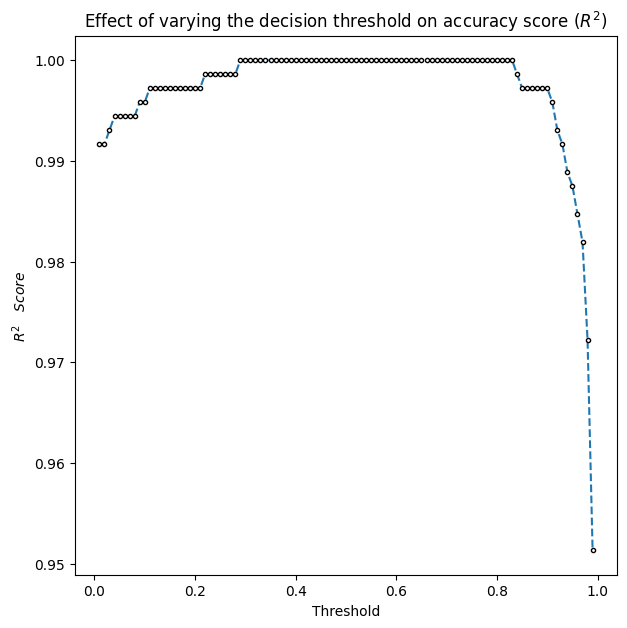

In [10]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.plot(ascores[:, 0], ascores[:, 1], mfc = "white", mec = "black", linestyle = "--", marker = "o", ms = 3)
axes.set_xlabel("Threshold")
axes.set_ylabel("$R^{2}\hspace{1}Score$")
axes.set_title("Effect of varying the decision threshold on accuracy score ($R^{2}$)")
plt.show()

In [22]:
# Precision-Recall curve
precisions = []
recalls = []

for prob in np.arange(0.01, 1, step = 0.001):
    preds = np.array(list(map(lambda lst: 1 if (lst[1] > prob) else 0, svc.predict_proba(test_x))))
    labels, counts = np.unique(preds, return_counts = True)
    precisions.append(precision_score(test_y, preds))
    recalls.append(recall_score(test_y, preds))

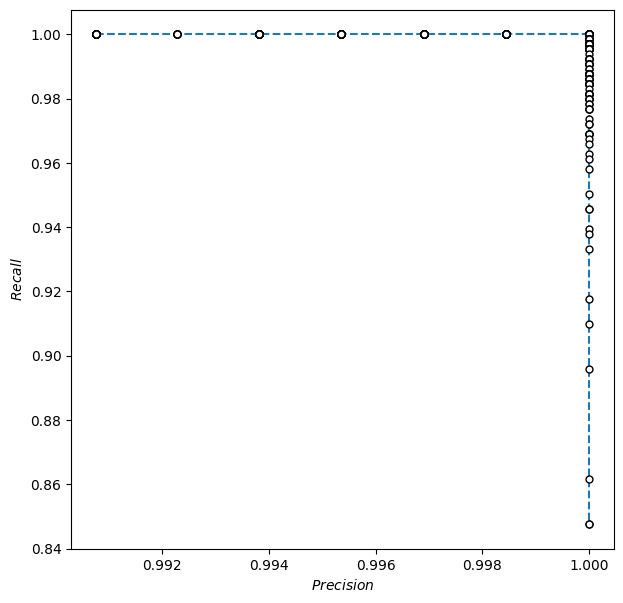

In [23]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.plot(precisions, recalls, mfc = "white", mec = "black", linestyle = "--", marker = "o", ms = 5)
axes.set_xlabel("$Precision$")
axes.set_ylabel("$Recall$")
plt.show()